In [ ]:
# TODO get labels thats is from the return ratio, somebody do that, just a sliding window just like mvavg.
# Update = Done. Someone forgot to save the code for this, not pointing fingers (tho im looking at Samriddha.).
import os
import pandas as pd
file_path=r'./Data_is_here'
files=os.listdir(file_path)
for file in files:
    df=pd.read_csv(file_path+'/'+file)
    # print(df['Return Ratio'])
    # break
    print(file)
    df['Stock_Movement_Label']=(df['Return Ratio'][5:]>0).astype(int)
    df.to_csv(file_path+'/'+file)

In [12]:
%pip install torch-geometric

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import torch
import pandas as pd
file_path=r'./Data_is_here'
save_path = r'./Preprocessed_data'
os.makedirs(save_path, exist_ok=True)
def set_data(file):
    df=pd.read_csv(file_path+'/'+file)
    df.fillna(0,inplace=True)
    # Assuming the dataframe is loaded into `df`
    # Drop the first two rows (metadata rows)
    df = df.iloc[2:].reset_index(drop=True)
    df.columns = [
        "Index", "Date", 
        "Close", "High", "Low", "Open", 
        "Volume",
        "MA_5", "MA_15", "MA_10", "MA_20", "MA_25", "MA_30", 
        "Normalized_Close",
        "Return_Ratio", "Percentage_Change_Open", "Percentage_Change_High", "Percentage_Change_Low", 
        "Sector", 
        "Sector_Encoded", 
        "Stock_Movement_Label"
    ]
    df = df.drop(columns=["Index","Date","Sector","Volume","Normalized_Close","Stock_Movement_Label"])
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df = df.dropna().reset_index(drop=True)
    df.to_csv(save_path+'/'+file)
    # print(df.describe())

for file in os.listdir(file_path):
    set_data(file)

COme back and chnage this here if the parametres are 15 and not 17 

In [55]:
import os
import torch
import pandas as pd
file_path=r'./Preprocessed_data'
def get_embeddings(file):
    df = pd.read_csv(file_path+'/'+file)
    df.reset_index(drop=True, inplace=True)
    df = df.drop(['Unnamed: 0'],axis=1)
    # print(df.describe())
    output_dir = os.path.join('./', "raw_embeddings")
    csv_dir = os.path.join('./', "raw_embeddings_csv")
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(csv_dir, exist_ok=True)
    all_tensors = []
    for i in range(len(df) - 5 + 1):
        # print(df[i:i + 5])
        # break
        tensor = torch.from_numpy(df[i:i + 5].values).float()
        all_tensors.append(tensor)
    all_tensors = torch.stack(all_tensors)  # Shape = (num_tensors, 5, num_columns)
    print(all_tensors.shape)
    tensor_file = os.path.join(output_dir, f"{file[:-4]}_raw_embeddings.pt")
    torch.save(all_tensors, tensor_file)
    # This(the csv part) not required idk what i was thinking
    # csv_file = os.path.join(csv_dir, f"{file[:-4]}_raw_embeddings.csv")
    # flattened_tensors = all_tensors.view(all_tensors.size(0), -1).numpy()  # Shape = (num_tensors, 5*num_columns)
    # pd.DataFrame(flattened_tensors).to_csv(csv_file, index=False)
    
    # print(f"Embeddings .csv saved in:\n- {tensor_file}\n- {csv_file}")
    print(f"Embeddings .pt saved in {output_dir}")

for file in os.listdir(file_path):
    get_embeddings(file)
    # break

torch.Size([1234, 5, 15])
Embeddings .pt saved in ./raw_embeddings
torch.Size([1234, 5, 15])
Embeddings .pt saved in ./raw_embeddings
torch.Size([1234, 5, 15])
Embeddings .pt saved in ./raw_embeddings
torch.Size([1234, 5, 15])
Embeddings .pt saved in ./raw_embeddings
torch.Size([1234, 5, 15])
Embeddings .pt saved in ./raw_embeddings
torch.Size([1234, 5, 15])
Embeddings .pt saved in ./raw_embeddings
torch.Size([1234, 5, 15])
Embeddings .pt saved in ./raw_embeddings
torch.Size([1234, 5, 15])
Embeddings .pt saved in ./raw_embeddings
torch.Size([1234, 5, 15])
Embeddings .pt saved in ./raw_embeddings
torch.Size([1234, 5, 15])
Embeddings .pt saved in ./raw_embeddings
torch.Size([1234, 5, 15])
Embeddings .pt saved in ./raw_embeddings
torch.Size([1234, 5, 15])
Embeddings .pt saved in ./raw_embeddings
torch.Size([1234, 5, 15])
Embeddings .pt saved in ./raw_embeddings
torch.Size([1234, 5, 15])
Embeddings .pt saved in ./raw_embeddings
torch.Size([1234, 5, 15])
Embeddings .pt saved in ./raw_embedd

In [3]:
batch_size = 1
seq_len = 5
input_size = 15
hidden_size = 16

x = torch.randn(batch_size, seq_len, input_size)  # Shape = (1, 5, 15)
# Forward pass
embeded = SequenceEncoder(input_size, seq_len, hidden_size)(x)
print(embeded.shape)  # Shape = (1, 16)

torch.Size([1, 64])


#### NOTE, that the features has changed from 15 to 17 so adjust accoerdingly

In [8]:
import torch

# from FinancialGraphAttentionmaster.model.graph_pool import SequenceEncoder as se


def get_Ai(week_seq_i, time_step = 5,input_size=15, hidden_size=16):
    #  Vi is the data from the week of shape (1,5,15) extra 1 is for the batch dimension
    # hi_prev is the hidden state from the previous week of shape (1,1,16)
    # TODO add a check for this if you want and to also check if week_seq_i are torch.tensors if not convert them
    
    encoder = SequenceEncoder(input_dim=input_size, time_step=time_step, hidden_dim=hidden_size)
    ai = encoder(week_seq_i)
    return ai
    

In [ ]:
# This is a test for Encoder block
batch_size = 1
time_step = 5 # Days
input_dim = 15 # Features
hidden_dim = 16 # Hidden dimension specified in the paper as {8, 16, 32, 16}
                # thats what it said this is how i interpreted it

seq = torch.randn(batch_size, time_step, input_dim)

a1 = get_Ai(seq[0].unsqueeze(0), time_step, input_dim, hidden_dim)
print(a1.shape)


In [35]:
# TODO Make the Adjacency Matrix of everything. Update = This is Done

# OK heres how im going to impelemnt it if u have a better version please come ahead why am i even writing this is its not like anyones going to read this anyway 
# welp just in case you do read it this is how im making it im making a string dict whre the key is the node and the values are the neighbours
# then when we want to acess the Ai list for each stcok we can just use a HashMap to do so.
import os
import pandas as pd
sector_mat = dict() ### GLOBAL VAR

file_path = './Preprocessed_data'
for file in os.listdir(file_path):
    df = pd.read_csv(file_path+"/"+file)
    # print(df.info)
    sector = df['Sector_Encoded'][0]
    if sector in sector_mat:
        sector_mat[sector].append(file[:-9])
    else:
        sector_mat[sector] = [file[:-9]]

sector_mat = {k: v for k, v in sector_mat.items() if len(v)>1}
for v in sector_mat.values():
    print(len(v),v)

51 ['COCHINSHIP', 'HONAUT', 'ASHOKLEY', 'AIAENG', 'FINPIPE', 'POLYCAB', 'BEL', 'THERMAX', 'SUZLON', 'APARINDS', 'GRAPHITE', 'HEG', 'ACE', 'PRAJIND', 'MAHSEAMLES', 'SIEMENS', 'APLAPOLLO', 'USHAMART', 'RHIM', 'JINDALSAW', 'KEI', 'BHEL', 'TITAGARH', 'SCHNEIDER', 'BDL', 'JWL', 'ABB', 'CARBORUNIV', 'KIRLOSBROS', 'GRINDWELL', 'ELECON', 'TIMKEN', 'ELGIEQUIP', 'KIRLOSENG', 'BEML', 'CGPOWER', 'ESCORTS', 'CUMMINSIND', 'FINCABLES', 'WELCORP', 'GRSE', 'KSB', 'ASTRAL', 'INOXWIND', 'RATNAMANI', 'SKFINDIA', 'GPIL', 'SUPREMEIND', 'TRITURBINE', 'GVT&D', 'HAL']
72 ['MANAPPURAM', 'MFSL', 'SBIN', 'J&KBANK', 'UJJIVANSFB', 'CHOLAFIN', 'INDUSINDBK', 'TATAINVEST', 'FEDERALBNK', 'AXISBANK', 'UNIONBANK', 'ICICIPRULI', 'SAMMAANCAP', 'BAJFINANCE', 'SUNDARMFIN', 'HDFCAMC', 'INDIANB', 'IOB', 'HDFCLIFE', 'ISEC', 'BSE', '360ONE', 'SHRIRAMFIN', 'BAJAJHLDNG', 'AUBANK', 'MCX', 'PNB', 'AAVAS', 'KOTAKBANK', 'ABCAPITAL', 'LTF', 'MOTILALOFS', 'NIACL', 'NAM-INDIA', 'YESBANK', 'PFC', 'JMFINANCIL', 'GICRE', 'BAJAJFINSV', 'PEL'

In [ ]:
# TODO Create the Graphs that is going to create the sector graphs and and then we need to create these graphs for like
# Ai and Gi also like per week
# Update = Made it. Excpet the HasMap to link this to the Ai list and the Gi list cause we dont have that yet.

name_matrix = dict()
for same_sector_stocks in sector_mat.values():
    for stock_key in same_sector_stocks:
        name_matrix[stock_key] = []
        for stock_value in same_sector_stocks:
            if stock_value != stock_key:
                name_matrix[stock_key].append(stock_value)

for key,value in name_matrix.items():
    print(key,value)

# TODO Create HashMap to acess the Ai list for the given names


COCHINSHIP ['HONAUT', 'ASHOKLEY', 'AIAENG', 'FINPIPE', 'POLYCAB', 'BEL', 'THERMAX', 'SUZLON', 'APARINDS', 'GRAPHITE', 'HEG', 'ACE', 'PRAJIND', 'MAHSEAMLES', 'SIEMENS', 'APLAPOLLO', 'USHAMART', 'RHIM', 'JINDALSAW', 'KEI', 'BHEL', 'TITAGARH', 'SCHNEIDER', 'BDL', 'JWL', 'ABB', 'CARBORUNIV', 'KIRLOSBROS', 'GRINDWELL', 'ELECON', 'TIMKEN', 'ELGIEQUIP', 'KIRLOSENG', 'BEML', 'CGPOWER', 'ESCORTS', 'CUMMINSIND', 'FINCABLES', 'WELCORP', 'GRSE', 'KSB', 'ASTRAL', 'INOXWIND', 'RATNAMANI', 'SKFINDIA', 'GPIL', 'SUPREMEIND', 'TRITURBINE', 'GVT&D', 'HAL']
HONAUT ['COCHINSHIP', 'ASHOKLEY', 'AIAENG', 'FINPIPE', 'POLYCAB', 'BEL', 'THERMAX', 'SUZLON', 'APARINDS', 'GRAPHITE', 'HEG', 'ACE', 'PRAJIND', 'MAHSEAMLES', 'SIEMENS', 'APLAPOLLO', 'USHAMART', 'RHIM', 'JINDALSAW', 'KEI', 'BHEL', 'TITAGARH', 'SCHNEIDER', 'BDL', 'JWL', 'ABB', 'CARBORUNIV', 'KIRLOSBROS', 'GRINDWELL', 'ELECON', 'TIMKEN', 'ELGIEQUIP', 'KIRLOSENG', 'BEML', 'CGPOWER', 'ESCORTS', 'CUMMINSIND', 'FINCABLES', 'WELCORP', 'GRSE', 'KSB', 'ASTRAL', '

In [ ]:
import os
import torch
import pandas as pd

# Graph adj list functions

def read_raw_embeddings(file_path, file_name):
    tensor_file = f"{file_path}/{file_name}_raw_embeddings.pt"
    embeddings_tensor = torch.load(tensor_file)
    print(f"Loaded tensor embeddings with shape = {embeddings_tensor.shape}")
    
    return embeddings_tensor

em_path = './raw_embeddings'
file_name = '3MINDIA_data'
embeddings_tensor = read_raw_embeddings(em_path, file_name)

hashmap_Ai = dict()
n_Ais = embeddings_tensor.shape[0]
file_path = './Data_is_here'
for file in os.listdir(file_path):
    hashmap_Ai[file[:-9]] = torch.ones(size = (n_Ais, 16)) # 16 Hidden dims

for key, value in hashmap_Ai.items():
    print(f"Key = {key}, Value = {value.shape}")

# Got to store the Ais in this hashmap ok?

Loaded tensor embeddings with shape = torch.Size([1234, 5, 17])
Key = COCHINSHIP, Value = torch.Size([1234, 64])
Key = MANAPPURAM, Value = torch.Size([1234, 64])
Key = RVNL, Value = torch.Size([1234, 64])
Key = MFSL, Value = torch.Size([1234, 64])
Key = SBIN, Value = torch.Size([1234, 64])
Key = BLUESTARCO, Value = torch.Size([1234, 64])
Key = J&KBANK, Value = torch.Size([1234, 64])
Key = COLPAL, Value = torch.Size([1234, 64])
Key = WESTLIFE, Value = torch.Size([1234, 64])
Key = GLENMARK, Value = torch.Size([1234, 64])
Key = CENTURYPLY, Value = torch.Size([1234, 64])
Key = ABREL, Value = torch.Size([1234, 64])
Key = UJJIVANSFB, Value = torch.Size([1234, 64])
Key = EIDPARRY, Value = torch.Size([1234, 64])
Key = EIHOTEL, Value = torch.Size([1234, 64])
Key = WIPRO, Value = torch.Size([1234, 64])
Key = HINDZINC, Value = torch.Size([1234, 64])
Key = JINDALSTEL, Value = torch.Size([1234, 64])
Key = CHOLAFIN, Value = torch.Size([1234, 64])
Key = INDUSINDBK, Value = torch.Size([1234, 64])
Key 

/var/folders/tq/snmht7dn5_71h91dhlsnsz8m0000gn/T/ipykernel_77776/1937941431.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings_tensor = torch.load(tensor_file)


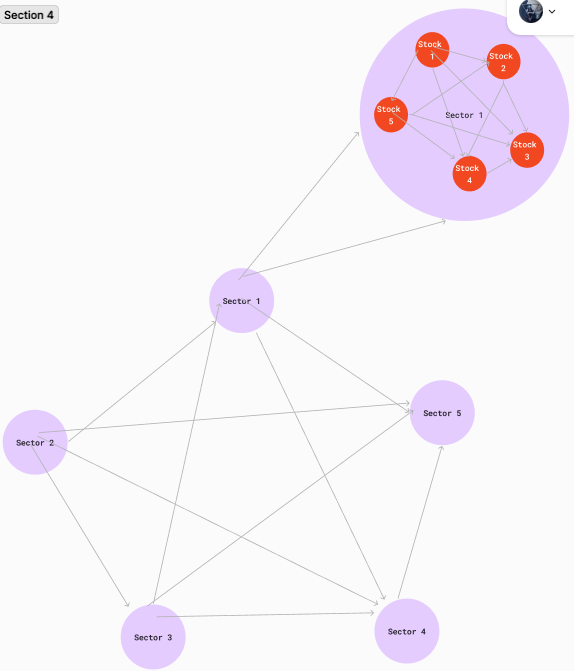

#### How the Adj Matrix looks or atleast this is what i think it looks it to my understanding a bit different from what the paper is doing, atleast thats what the GAT in the code he sent is using.

#### There are like 3 models in the repo the most basic one is used below, we should probably make this better.

In [ ]:
# TODO cluster up the same sector stocks make sure that Ai are stored in an
# adjacency matrix as specifed in the paper this is along raw Ai will be the input for GAT

# Update = Made it. Except the HashMap which has to be done with the Running you can make a skeleton code
# tho i think it will be better to be done then? or maybe im just being lazy

# from FinancialGraphAttentionmaster.model.graph_pool import CategoricalGraph as gat

def get_gi(ai_sq, ai_sn):
    # ai_sq Ai for a stock of week i
    gat_encoder = GAT(in_dim = 16, out_dim=16)
    gi = gat_encoder(ai_sq, ai_sn)
    return gi




In [ ]:
# Helper function for Long Term Sequential Learning with Short Term Embeddings
# Input is the Ai of all stocks and Gi of all stocks
def get_T_i(ai_sq_list, gi_sq_list, input_dim=16, hidden_size=64, t=5):
    # ai_sq_list is the list of Ai for all weeks of a stock
    # gi_sq_list is the list of Gi for all weeks of a stock
    
    T_Ai_encoder = AttentionBlock(input_dim=input_dim, hidden_dim=hidden_size, time_step=t)
    T_Gi_encoder = AttentionBlock(input_dim=input_dim, hidden_dim=hidden_size, time_step=t)
    
    T_ai_long_term = []
    T_gi_long_term = []
    
    for i in range(t, len(ai_sq_list)):
        U_Ai = torch.stack(ai_sq_list[i-t:i])  # Shape = (t, input_dim)
        U_Gi = torch.stack(gi_sq_list[i-t:i])  # Shape = (t, input_dim)
        
        ti_ai = T_Ai_encoder(U_Ai)  # Shape = (t,)
        ti_gi = T_Gi_encoder(U_Gi)  # Shape = (t,)
        
        T_ai_long_term.append(ti_ai.sum(dim=0))  # Shape = (input_dim,)
        T_gi_long_term.append(ti_gi.sum(dim=0))  # Shape = (input_dim,)
    
    T_ai_long_term = torch.stack(T_ai_long_term)  # Shape = (num_windows, input_dim)
    T_gi_long_term = torch.stack(T_gi_long_term)  # Shape = (num_windows, input_dim)
    
    return T_ai_long_term, T_gi_long_term

In [27]:
# Sector Graph

def max_pool_sector_embeddings(data):
    data = torch.stack(data)
    return torch.max(data, dim=0)[0]


In [265]:
#RUN THIS

import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
'''
Attentive GRU
Takes in raw week information and then makes Ai for all of the weeks for all the stocks (if bacthed)
'''

class AttentionBlock(nn.Module):
    def __init__(self, hidden_dim):
        super(AttentionBlock, self).__init__()
        self.fc = nn.Linear(hidden_dim, 1)
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        """
        x: torch.tensor (batch_size, time_step, hidden_dim)
        """
        attention_scores = self.fc(x)  # Shape = (batch_size, time_step, 1)
        attention_scores = self.tanh(attention_scores)
        attention_weights = self.softmax(attention_scores)  # Shape = (batch_size, time_step, 1)
        return attention_weights

class SequenceEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(SequenceEncoder, self).__init__()
        self.gru1 = nn.GRU(input_size=input_dim, hidden_size=hidden_dim, num_layers=1, batch_first=True)
        self.gru2 = nn.GRU(input_size=hidden_dim, hidden_size=hidden_dim, num_layers=1, batch_first=True)
        self.attention_block = AttentionBlock(hidden_dim)
        self.dropout = nn.Dropout(0.2)
        self.hidden_dim = hidden_dim
    
    def forward(self, seq):
        """
        seq: torch.tensor (batch_size, time_step, input_dim)
        """
        seq_vector, _ = self.gru1(seq)  # Shape = (batch_size, time_step, hidden_dim)
        # print("1\t",seq_vector.shape)
        seq_vector, _ = self.gru2(seq_vector) # Shape = (batch_size, time_step, hidden_dim)
        # print("2\t",seq_vector.shape)
        seq_vector = self.dropout(seq_vector)
        # print("3\t",seq_vector.shape)
        
        attention_weight = self.attention_block(seq_vector)  # Shape = (batch_size, timestep, 1)
        # print("4\t",attention_weight)
        Ai = seq_vector * attention_weight  # Shape = (batch_size, time_step, hidden_dim)
        # print("5\t",Ai.shape)
        Ai = torch.sum(Ai, dim=0)  # Shape = (batch_size, hidden_dim)
        # print("6\t",Ai.shape)

        
        return Ai

In [1006]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class GAT(nn.Module):
    def __init__(self, in_dim=16, out_dim=16):
        super().__init__()
        self.W = nn.Linear(in_dim, out_dim)
        self.attn_vec = nn.Parameter(torch.randn(2 * out_dim, 1))
        self.leaky_relu = nn.LeakyReLU(0.2)

    def forward(self, ai_sq, ai_sn_list):
        """
        Args:
            ai_sq: Central node features (batch_size, seq_len, features) - (B, 6, 16)
            ai_sn_list: Neighbor features (num_neighbors, B, 6, 16)
        """
        num_neighbors, B, seq_len, feat_dim = ai_sn_list.shape
        
        # Project features
        central_proj = self.W(ai_sq)  # (B, 6, 16)
        neighbors_proj = self.W(ai_sn_list)  # (num_neighbors, B, 6, 16)

        # Prepare for attention computation
        central_expanded = central_proj.unsqueeze(0)  # (1, B, 6, 16)
        central_expanded = central_expanded.repeat(num_neighbors, 1, 1, 1)  # (num_neighbors, B, 6, 16)

        # Concatenate features along feature dimension
        concat_features = torch.cat([
            central_expanded,
            neighbors_proj
        ], dim=-1)  # (num_neighbors, B, 6, 32)

        # Compute attention scores
        scores = torch.matmul(concat_features, self.attn_vec)  # (num_neighbors, B, 6, 1)
        scores = self.leaky_relu(scores.squeeze(-1))  # (num_neighbors, B, 6)
        
        # Normalize attention weights
        alpha = F.softmax(scores, dim=0)  # (num_neighbors, B, 6)
        alpha = alpha.unsqueeze(-1)  # (num_neighbors, B, 6, 1)

        # Aggregate neighbor features
        weighted_neighbors = alpha * neighbors_proj  # (num_neighbors, B, 6, 16)
        aggregated = torch.sum(weighted_neighbors, dim=0)  # (B, 6, 16)
        
        # Combine with central node features
        g_sq = F.relu(aggregated + central_proj)  # (B, 6, 16)
        
        return g_sq

In [1007]:
#RUN THIS
'''
Long Term Sequential Learning Embedding Generator
'''
import torch.nn as nn
class AttentionBlock(nn.Module):
    def __init__(self, hidden_dim):
        super(AttentionBlock, self).__init__()
        self.fc = nn.Linear(hidden_dim, 1)
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        """
        x: torch.tensor (batch_size, time_step, hidden_dim)
        """
        attention_scores = self.fc(x)  # Shape = (batch_size, time_step, 1)
        attention_scores = self.tanh(attention_scores)
        attention_weights = self.softmax(attention_scores)  # Shape = (batch_size, time_step, 1)
        return attention_weights

# GRU with Attention: Attention-based GRU for generating long-term embedding
class AttentionBlockLTSL(nn.Module):
    def __init__(self, input_dim, hidden_dim, time_step):
        super(AttentionBlockLTSL, self).__init__()
        self.gru = nn.GRU(input_size=input_dim, hidden_size=hidden_dim, num_layers=1, batch_first=True)
        self.attention_block = AttentionBlock(hidden_dim)

    def forward(self, seq):
        """
        seq: torch.tensor (batch_size, time_step, input_dim)
        """
        # Check if seq has 3 dimensions, if not, adjust the shape
        if seq.dim() == 2:  # If seq is 2D, add a time step dimension
            seq = seq.unsqueeze(1)  # This will make seq shape (batch_size, 1, input_dim)

        # Make sure the shape is (batch_size, time_step, input_dim)
        assert seq.dim() == 3, f"Expected 3D input, got {seq.dim()}D"

        # Pass the sequence through the GRU
        gru_out, _ = self.gru(seq)  # Shape = (batch_size, time_step, hidden_dim)
        
        # Apply attention mechanism
        attention_weights = self.attention_block(gru_out)  # Shape = (batch_size, time_step, 1)
        
        # Element-wise multiplication to get weighted sequence
        weighted_seq = gru_out * attention_weights  # Shape = (batch_size, time_step, hidden_dim)
        
        # Summing over the time_step dimension to get the long-term embedding
        long_term_embedding = torch.sum(weighted_seq, dim=1)  # Shape = (batch_size, hidden_dim)
        
        return long_term_embedding

In [1008]:
#RUN THIS


# TODO the universal map is Task 3 or 4 so im not boterhing with that right now.
# Update i guess i have to now

import torch
import torch.nn as nn
import numpy as np

class SectorEmbeddingGenerator(nn.Module):
    def __init__(self, input_dim=16, hidden_dim=16):
        super(SectorEmbeddingGenerator, self).__init__()
        self.gat = GAT(in_dim=input_dim, out_dim=hidden_dim)
    
    def forward(self, data, neighbors):
        return self.gat(data, neighbors)

class FinalLayer(nn.Module):
    def __init__(self, input_dim=16, hidden_dim=16):
        super(FinalLayer, self).__init__()
        self.fc = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
    
    def forward(self, short_term_embeddings, intra_sector_embeddings, inter_sector_embeddings):
        return self.relu(self.fc(torch.concat((short_term_embeddings, intra_sector_embeddings, inter_sector_embeddings),dim=-1)))


In [1009]:
#RUN THIS

'''
Loss Function
'''

import torch
import torch.nn as nn
import torch.nn.functional as F

class StockPredictionLoss(nn.Module):
    def __init__(self, delta: float = 0.5, lambda_reg: float = 1e-4):
        """
        Initialize the Stock Prediction Loss.

        Args:
            delta (float): Weighting factor between L_rank and L_move.
            lambda_reg (float): Regularization coefficient for L2 penalty.
        """
        super(StockPredictionLoss, self).__init__()
        self.delta = delta
        self.lambda_reg = lambda_reg

    def forward(self, tau_F, e1, e2, b1, b2, y_return, y_move, mask=None):
        """
        Compute the loss.

        Args:
            tau_F (torch.Tensor) = Output from FinalLayer
            e1 (torch.Tensor): Task-specific hidden vector for return ratio (shape: [d]).
            e2 (torch.Tensor): Task-specific hidden vector for movement (shape: [d]).
            b1 (torch.Tensor): Bias term for return ratio (scalar).
            b2 (torch.Tensor): Bias term for movement (scalar).
            y_return (torch.Tensor): True return ratios (shape: [batch_size]).
            y_move (torch.Tensor): True binary movement labels (shape: [batch_size]).
            mask (torch.Tensor): Optional mask for valid pairs in L_rank (shape: [batch_size, batch_size]).
        
        Returns:
            torch.Tensor: Total loss (scalar).
        """
        # 1. Compute Predictions
        y_return_pred = torch.matmul(tau_F, e1) + b1  # Shape: [batch_size]
        y_move_pred = torch.sigmoid(torch.matmul(tau_F, e2) + b2)  # Shape: [batch_size]
        
        # 2. Compute Pairwise Ranking Loss (L_rank)
        pairwise_diff_pred = y_return_pred.unsqueeze(1) - y_return_pred.unsqueeze(0)  # Shape: [batch_size, batch_size]
        pairwise_diff_true = y_return.unsqueeze(1) - y_return.unsqueeze(0)  # Shape: [batch_size, batch_size]

        # Mask invalid pairs (optional)
        if mask is not None:
            pairwise_diff_pred = pairwise_diff_pred * mask
            pairwise_diff_true = pairwise_diff_true * mask

        # Max(0, -ˆΔ × Δ)
        l_rank = F.relu(-pairwise_diff_pred * pairwise_diff_true).mean()

        # 3. Compute Binary Cross-Entropy Loss for Movement (L_move)
        l_move = F.binary_cross_entropy(y_move_pred, y_move)

        # 4. L2 Regularization
        l2_reg = torch.sum(e1**2) + torch.sum(e2**2) + b1**2 + b2**2

        # 5. Total Loss
        total_loss = (1 - self.delta) * l_rank + self.delta * l_move + self.lambda_reg * l2_reg

        return total_loss

In [1010]:
#RUN THIS
# Genrating some required dicts and graphs

import torch
import os
raw_dict = dict()
file_path=r'./raw_embeddings'
for file in os.listdir(file_path):
    data = torch.load(file_path+f"/{file}", weights_only=True)
    raw_dict[file[:-23]] = data

import pandas as pd
sector_mat = dict() ### GLOBAL VAR

pamhsah_rotces={}
file_path = r'./Preprocessed_data'
for file in os.listdir(file_path):
    df = pd.read_csv(file_path+"/"+file)
    # print(df.info)
    sector = df['Sector_Encoded'][0]
    pamhsah_rotces[file]=sector
    if sector in sector_mat:
        sector_mat[sector].append(file[:-9])
    else:
        sector_mat[sector] = [file[:-9]]
sector_mat = {k: v for k, v in sector_mat.items() if len(v)>1}

name_matrix = dict()
for same_sector_stocks in sector_mat.values():
    for stock_key in same_sector_stocks:
        name_matrix[stock_key] = []
        for stock_value in same_sector_stocks:
            if stock_value != stock_key:
                name_matrix[stock_key].append(stock_value)


# Graph of inter sector

inter_sector_matrix = dict()
for sector in sector_mat.keys():
    inter_sector_matrix[sector]=[]
    for other_sector in sector_mat.keys():
        if(sector!=other_sector):
            inter_sector_matrix[sector].append(other_sector)
for k,v in inter_sector_matrix.items():
    print(k,v)


    # for stock_key in same_sector_stocks:
    #     name_matrix[stock_key] = []
    #     for stock_value in same_sector_stocks:
    #         if stock_value != stock_key:
    #             name_matrix[stock_key].append(stock_value)

# for key,value in name_matrix.items():
#     print(key,value)



9.0 [7.0, 2.0, 11.0, 1.0, 6.0, 4.0, 14.0, 16.0, 18.0, 12.0, 20.0, 5.0, 17.0, 0.0, 15.0, 8.0, 19.0, 3.0, 13.0]
7.0 [9.0, 2.0, 11.0, 1.0, 6.0, 4.0, 14.0, 16.0, 18.0, 12.0, 20.0, 5.0, 17.0, 0.0, 15.0, 8.0, 19.0, 3.0, 13.0]
2.0 [9.0, 7.0, 11.0, 1.0, 6.0, 4.0, 14.0, 16.0, 18.0, 12.0, 20.0, 5.0, 17.0, 0.0, 15.0, 8.0, 19.0, 3.0, 13.0]
11.0 [9.0, 7.0, 2.0, 1.0, 6.0, 4.0, 14.0, 16.0, 18.0, 12.0, 20.0, 5.0, 17.0, 0.0, 15.0, 8.0, 19.0, 3.0, 13.0]
1.0 [9.0, 7.0, 2.0, 11.0, 6.0, 4.0, 14.0, 16.0, 18.0, 12.0, 20.0, 5.0, 17.0, 0.0, 15.0, 8.0, 19.0, 3.0, 13.0]
6.0 [9.0, 7.0, 2.0, 11.0, 1.0, 4.0, 14.0, 16.0, 18.0, 12.0, 20.0, 5.0, 17.0, 0.0, 15.0, 8.0, 19.0, 3.0, 13.0]
4.0 [9.0, 7.0, 2.0, 11.0, 1.0, 6.0, 14.0, 16.0, 18.0, 12.0, 20.0, 5.0, 17.0, 0.0, 15.0, 8.0, 19.0, 3.0, 13.0]
14.0 [9.0, 7.0, 2.0, 11.0, 1.0, 6.0, 4.0, 16.0, 18.0, 12.0, 20.0, 5.0, 17.0, 0.0, 15.0, 8.0, 19.0, 3.0, 13.0]
16.0 [9.0, 7.0, 2.0, 11.0, 1.0, 6.0, 4.0, 14.0, 18.0, 12.0, 20.0, 5.0, 17.0, 0.0, 15.0, 8.0, 19.0, 3.0, 13.0]
18.0 [9.0,

In [1011]:
#RUN THIS
'''
Accumalation of First three Layers
'''

class BaseModel(nn.Module):
    def __init__(self):
        super(BaseModel, self).__init__()
        self.gru = SequenceEncoder(15,16)
        self.g_gat = GAT(16,16)
        self.ai_encoder = AttentionBlockLTSL(input_dim=16, hidden_dim=16, time_step=5)
        self.gi_encoder = AttentionBlockLTSL(input_dim=16, hidden_dim=16, time_step=5)
    
    def get_T_i(self, ai_sq_list, gi_sq_list, input_dim=16, hidden_size=16, t=5):
        T_ai_long_term = []
        T_gi_long_term = []
        print("ai_sq_list",ai_sq_list.shape)
        print("gi_sq_list",gi_sq_list.shape)

        # for i in range(t, 6):
            # print("ai sq list hp",ai_sq_list.shape)
            # U_Ai = torch.stack([ai_sq for ai_sq in ai_sq_list[i-t:i]])  # Shape = (1, t, input_dim)
            # U_Gi = torch.stack([gi_sq for gi_sq in gi_sq_list[i-t:i]])  # Shape = (1, t, input_dim)
        # print("U_AI is ",U_Ai.shape)
        ti_ai = self.ai_encoder(ai_sq_list)  # Shape = (1, input_dim)
        ti_gi = self.gi_encoder(gi_sq_list)  # Shape = (1, input_dim)
            # print("Ti",ti_ai)
            # T_ai_long_term.append(ti_ai.squeeze(0))  # Remove batch dimension
            # T_gi_long_term.append(ti_gi.squeeze(0))  # Remove batch dimension
        print("T_AI_LONG_TERM",T_ai_long_term)
        T_ai_long_term = ti_ai  # Shape = (num_windows, input_dim)
        T_gi_long_term = ti_gi  # Shape = (num_windows, input_dim)
        return T_ai_long_term, T_gi_long_term
    
    def forward(self, batch_data, names, name_matrix):
        # print("Batch data size", batch_data[0].shape)
        hashmapAi = dict()
        for i, name in enumerate(names):
            gru_out = []
            for j in range(6):
                gru_out.append(self.gru(batch_data[i][j:j+5]))
            gru_out = torch.stack(gru_out).unsqueeze(0)
            # print("GRU ouT shape", gru_out.shape)
            hashmapAi[name[:-9]] = gru_out
            # print("HASHMAP AI",hashmapAi[name[:-9]].shape)

        # print(hashmapAi)

        # adj_mat_intra_sector = name_matrix
        hashmapGi = dict()
        for name in name_matrix.keys():
            ai_sq = hashmapAi[name]  # Shape: (1, 6, 16)
            
            # Initialize a list to collect the slices for the final result
            gi_output = []
            
            for i in range(6):  # Loop over the 6 slices
                ai_sq_slice = ai_sq[:, i:i+1, :]  # Slice ai_sq for each i: (1, 1, 16)
                
                ai_sn_slice = []
                for sector_neighbour in name_matrix[name]:  # Assuming name_matrix is a dict mapping names to sector neighbors
                    ai_sn_slice.append(hashmapAi[sector_neighbour][:, i:i+1, :])  # Slice each sector neighbour for i: (71, 1, 16)
                
                ai_sn_slice = torch.stack(ai_sn_slice)  # Shape: (71, 1, 16)
                
                # Now, send ai_sq_slice and ai_sn_slice to g_gat
                gi_result = self.g_gat(ai_sq_slice, ai_sn_slice)  # Result should have shape (1, 1, 16)
                
                # Append the result to the list to gather all slices
                gi_output.append(gi_result.squeeze(dim=1))
    
            # Stack the slices to form the final output (1, 6, 16)
            hashmapGi[name] = torch.cat(gi_output, dim=1)  # Concatenate along the second dimension (1, 6, 16)

        
        hashmapTAi = dict()
        hashmapTGi = dict()
        for name in hashmapAi.keys():
            gi_list = hashmapGi[name]
            ai_list = hashmapAi[name]
            T_A, T_G = self.get_T_i(ai_list, gi_list)
            hashmapTAi[name] = T_A
            hashmapTGi[name] = T_G
        
        return hashmapAi, hashmapGi, hashmapTAi, hashmapTGi

# class BatchBaseModel:
#     def __init__(self, batch_size=10):
#         self.base_model = BaseModel()
#         self.batch_size = batch_size

#     def process_embeddings(self, raw_dict, name_matrix):
#         # Split raw_dict into batches
#         stock_names = list(raw_dict.keys())
#         batch_results1 = {}
#         batch_results2 = {}
        

#         for i in range(0, len(stock_names), self.batch_size):
#             batch_names = stock_names[i:i+self.batch_size]
#             batch_data = {name: raw_dict[name] for name in batch_names}
            
#             # Create a subset of name_matrix for this batch
#             batch_name_matrix = {
#                 name: name_matrix.get(name, [])
#                 for name in batch_names
#             }

#             # Process batch
#             batch_output1, batch_output2 = self.base_model(batch_data, batch_name_matrix)
            
#             # Accumulate results
#             batch_results1.update(batch_output1)
#             batch_results2.update(batch_output2)
            

#         return batch_results1, batch_results2

'''
Intra Sector Learning GAT
'''
class SectorEmbedding(nn.Module):
    def __init__(self, input_dim=16, output_dim=16):
        super(SectorEmbedding, self).__init__()
        self.base = BaseModel()
        self.t_gat = SectorEmbeddingGenerator()
    
    def max_pool_sector_embeddings(self, data):
        return torch.max(data, dim=1)[0]
    
    def forward(self, batch_data, names, name_matrix):
        hashmapAi, hashmapGi, hashmapTAi, hashmapTGi = self.base(batch_data, names, name_matrix)
        rawTi={}
        for sector, stocks in sector_mat.items():
            # Fetch embeddings for all stocks in the sector
            # print(hashmapTGi[stocks[0]].shape)
            sector_stock_TGi = torch.stack([hashmapTGi[stock] for stock in stocks])  # Shape: (num_stocks_in_sector, embedding_dim)
            # print(sector_stock_TGi.shape)
            # Apply max-pooling to get a single embedding vector for the sector
            rawTi[sector] = torch.max(sector_stock_TGi, dim=0)[0]  # Shape: (embedding_dim,)
        # for k,v in rawTi.items():
        #     print(k,v.shape)
        hashmapTi = {}
        for sector in inter_sector_matrix.keys():
            hashmapTi[sector]=self.t_gat(rawTi[sector], [rawTi[neighbor] for neighbor in inter_sector_matrix[sector]])
        
        return hashmapAi, hashmapGi, hashmapTi, hashmapTAi, hashmapTGi

'''
Last Layer which is used to calculate y_hat
'''

class LastLayer(nn.Module):
    def __init__(self, input_dim=16, output_dim=16):
        super(LastLayer, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)
        self.relu = nn.ReLU()
    
    def forward(self, t_a_i, t_g_i, t_f_i):
        concatenated_vector = torch.cat([t_a_i, t_g_i, t_f_i], dim=0)
        output = self.relu(self.fc(concatenated_vector))
        return output


# batch_processor = SectorEmbedding()
# results1 = batch_processor(raw_dict, name_matrix)

# print(results1)

In [1012]:
# Dict of stocks in same sectors acc to their names and sectors

for key, item in sector_mat.items():
    print(f"{key}: {item}")

9.0: ['360ONE', 'AAVAS', 'ABCAPITAL', 'AUBANK', 'AXISBANK', 'BAJAJFINSV', 'BAJAJHLDNG', 'BAJFINANCE', 'BANDHANBNK', 'BANKBARODA', 'BANKINDIA', 'BSE', 'CANBK', 'CANFINHOME', 'CDSL', 'CENTRALBK', 'CGCL', 'CHOLAFIN', 'CHOLAHLDNG', 'CREDITACC', 'CRISIL', 'CUB', 'FEDERALBNK', 'GICRE', 'HDFCAMC', 'HDFCBANK', 'HDFCLIFE', 'HUDCO', 'ICICIBANK', 'ICICIGI', 'ICICIPRULI', 'IDBI', 'IDFCFIRSTB', 'IEX', 'IFCI', 'IIFL', 'INDIANB', 'INDUSINDBK', 'IOB', 'ISEC', 'J&KBANK', 'JMFINANCIL', 'KARURVYSYA', 'KOTAKBANK', 'LICHSGFIN', 'LTF', 'M&MFIN', 'MAHABANK', 'MANAPPURAM', 'MCX', 'MFSL', 'MOTILALOFS', 'MUTHOOTFIN', 'NAM-INDIA', 'NIACL', 'PEL', 'PFC', 'PNBHOUSING', 'PNB', 'POONAWALLA', 'RBLBANK', 'RECLTD', 'SAMMAANCAP', 'SBILIFE', 'SBIN', 'SHRIRAMFIN', 'SUNDARMFIN', 'TATAINVEST', 'UCOBANK', 'UJJIVANSFB', 'UNIONBANK', 'YESBANK']
7.0: ['3MINDIA', 'GODREJIND', 'SWANENERGY']
2.0: ['AARTIIND', 'ALKYLAMINE', 'ATUL', 'BALAMINES', 'BASF', 'BAYERCROP', 'CHAMBLFERT', 'COROMANDEL', 'DEEPAKFERT', 'DEEPAKNTR', 'EIDPARRY', 

In [1013]:
# Graph of stocks in same sectors acc to their names

for key, item in name_matrix.items():
    print(f"{key}: {item}")

360ONE: ['AAVAS', 'ABCAPITAL', 'AUBANK', 'AXISBANK', 'BAJAJFINSV', 'BAJAJHLDNG', 'BAJFINANCE', 'BANDHANBNK', 'BANKBARODA', 'BANKINDIA', 'BSE', 'CANBK', 'CANFINHOME', 'CDSL', 'CENTRALBK', 'CGCL', 'CHOLAFIN', 'CHOLAHLDNG', 'CREDITACC', 'CRISIL', 'CUB', 'FEDERALBNK', 'GICRE', 'HDFCAMC', 'HDFCBANK', 'HDFCLIFE', 'HUDCO', 'ICICIBANK', 'ICICIGI', 'ICICIPRULI', 'IDBI', 'IDFCFIRSTB', 'IEX', 'IFCI', 'IIFL', 'INDIANB', 'INDUSINDBK', 'IOB', 'ISEC', 'J&KBANK', 'JMFINANCIL', 'KARURVYSYA', 'KOTAKBANK', 'LICHSGFIN', 'LTF', 'M&MFIN', 'MAHABANK', 'MANAPPURAM', 'MCX', 'MFSL', 'MOTILALOFS', 'MUTHOOTFIN', 'NAM-INDIA', 'NIACL', 'PEL', 'PFC', 'PNBHOUSING', 'PNB', 'POONAWALLA', 'RBLBANK', 'RECLTD', 'SAMMAANCAP', 'SBILIFE', 'SBIN', 'SHRIRAMFIN', 'SUNDARMFIN', 'TATAINVEST', 'UCOBANK', 'UJJIVANSFB', 'UNIONBANK', 'YESBANK']
AAVAS: ['360ONE', 'ABCAPITAL', 'AUBANK', 'AXISBANK', 'BAJAJFINSV', 'BAJAJHLDNG', 'BAJFINANCE', 'BANDHANBNK', 'BANKBARODA', 'BANKINDIA', 'BSE', 'CANBK', 'CANFINHOME', 'CDSL', 'CENTRALBK', 'CGCL

In [1014]:
#Training Function

import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from typing import Dict, List, Tuple

def train_fingat(model: LastLayer, data_loader, learning_rate: float = 0.001, delta: float = 0.01, epochs: int = 50):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    ranking_loss = StockPredictionLoss()
    sector_embedder=SectorEmbedding()

    ranking_loss.to(device)
    model.to(device)
    sector_embedder.to(device)
    
    best_mrr = 0
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        
        for batch_data, names in data_loader:
            optimizer.zero_grad()
            
            hashmapAi, hashmapGi, hashmapTi, hashmapTAi, hashmapTGi = sector_embedder(batch_data, names, name_matrix)
            
            for sector, stocks in sector_mat:
                y_hat = []
                for stock in stocks:
                    short_term = hashmapGi[stock]
                    long_term = hashmapTGi[stock]
                    sector_embed = hashmapTi[sector]
                    y_hat.append(model(short_term, long_term, sector_embed))
                y_hat = torch.tensor(y_hat)
                print("y_hat = ",y_hat.shape)
            
                # # Compute losses
                # y_hat = torch.tensor(y_hat)
                # rank_loss = ranking_loss(y_hat, ,)
                
                # # Combined loss with balancing parameter
                # loss = rank_loss + delta * rank_loss
                # loss.backward()
                # optimizer.step()
                # total_loss += loss.item()
        
        # Validation
        # model.eval()
        # val_mrr = evaluate_mrr(model, val_loader, k=10)
        
        # if val_mrr > best_mrr:
        #     best_mrr = val_mrr
        #     torch.save(model.state_dict(), 'best_fingat_model.pt')
        
        # print(f'Epoch {epoch+1}/{epochs}:')
        # print(f'Training Loss: {total_loss/len(train_loader):.4f}')
        # print(f'Validation MRR@10: {val_mrr:.4f}')

def evaluate_mrr(model: LastLayer, data_loader: DataLoader, k: int = 10):
    model.eval()
    reciprocal_ranks = []
    
    with torch.no_grad():
        for batch in data_loader:
            _, return_pred = model(batch['features'],
                                 batch['intra_adj'],
                                 batch['inter_adj'])
            
            # Get rankings
            pred_ranks = torch.argsort(return_pred, descending=True)
            true_ranks = torch.argsort(batch['return_ratio'], descending=True)
            
            # Compute MRR@k
            for i in range(min(k, len(pred_ranks))):
                if pred_ranks[i] in true_ranks[:k]:
                    reciprocal_ranks.append(1.0 / (i + 1))
                    break
    
    return np.mean(reciprocal_ranks) if reciprocal_ranks else 0.0



In [1015]:
import os
import numpy as np
import pandas as pd
import torch

class StockDataLoader:
    def __init__(self, data_dir, window_size):
        self.data_dir = data_dir
        self.window_size = window_size
        self.file_paths = [
            os.path.join(data_dir, f) 
            for f in os.listdir(data_dir) 
            if f.endswith('.csv')
        ]
        self.data, self.stock_names = self._load_all_data()
        self.num_stocks = len(self.data)
        self.max_start_indices = [
            len(stock) - window_size for stock in self.data
        ]

    def _load_all_data(self):
        """Load all stock data into memory."""
        data = []
        stock_names = []
        for path in self.file_paths:
            df = pd.read_csv(path)
            df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
            stock_data = df.values  # Convert to numpy array (timesteps, features)
            stock_names.append(os.path.basename(path))  # Store the stock name (filename)
            data.append(stock_data)
        return data, stock_names

    def __iter__(self):
        """Generator that yields batches indefinitely."""
        while True:
            batch = []
            stock_batch_names = []
            for i in range(self.num_stocks):
                start_idx = np.random.randint(0, self.max_start_indices[i] + 1)
                window = self.data[i][start_idx:start_idx + self.window_size]
                batch.append(window)
                stock_batch_names.append(self.stock_names[i])  # Get the stock name for this data
            # Stack to form (num_stocks, window_size, features)
            batch_tensor = torch.tensor(np.stack(batch), dtype=torch.float32).to(device)
            yield batch_tensor, stock_batch_names

# Usage Example
data_dir = 'D:\Code\DS\IT258-Project\Preprocessed_data'  # Directory containing 403 CSV files
window_size = 30  # Number of timesteps per batch for each stock

# Initialize the data loader
data_loader = StockDataLoader(data_dir, window_size)

# Create an iterator
data_iter = iter(data_loader)

# Fetch one batch (contains all 403 stocks, each with a window of 30 timesteps)
batch, stock_names = next(data_iter)
print(batch.shape)  # Output: torch.Size([403, 30, num_features])
print(stock_names)  # List of stock names corresponding to each tensor in the batch


torch.Size([408, 30, 15])
['360ONE_data.csv', '3MINDIA_data.csv', 'AARTIIND_data.csv', 'AAVAS_data.csv', 'ABBOTINDIA_data.csv', 'ABB_data.csv', 'ABCAPITAL_data.csv', 'ABFRL_data.csv', 'ABREL_data.csv', 'ACC_data.csv', 'ACE_data.csv', 'ADANIENT_data.csv', 'ADANIGREEN_data.csv', 'ADANIPORTS_data.csv', 'ADANIPOWER_data.csv', 'AFFLE_data.csv', 'AIAENG_data.csv', 'AJANTPHARM_data.csv', 'ALKEM_data.csv', 'ALKYLAMINE_data.csv', 'ALOKINDS_data.csv', 'AMBER_data.csv', 'AMBUJACEM_data.csv', 'ANANTRAJ_data.csv', 'APARINDS_data.csv', 'APLAPOLLO_data.csv', 'APLLTD_data.csv', 'APOLLOHOSP_data.csv', 'APOLLOTYRE_data.csv', 'ASAHIINDIA_data.csv', 'ASHOKLEY_data.csv', 'ASIANPAINT_data.csv', 'ASTERDM_data.csv', 'ASTRAL_data.csv', 'ASTRAZEN_data.csv', 'ATGL_data.csv', 'ATUL_data.csv', 'AUBANK_data.csv', 'AUROPHARMA_data.csv', 'AVANTIFEED_data.csv', 'AXISBANK_data.csv', 'BAJAJ-AUTO_data.csv', 'BAJAJFINSV_data.csv', 'BAJAJHLDNG_data.csv', 'BAJFINANCE_data.csv', 'BALAMINES_data.csv', 'BALKRISIND_data.csv', '

In [1016]:
# for data,names in data_loader:
#     print(data.shape,'NOWWWWWWWWWWWWWWWWWW',names)
#     break

In [1017]:
model = LastLayer()
model.to(device)
train_fingat(model,data_loader)
# print(x)

ai_sq_list torch.Size([1, 6, 16])
gi_sq_list torch.Size([1, 96])


RuntimeError: input.size(-1) must be equal to input_size. Expected 16, got 96